# Practical work 4: Frequency filtering, color

In [1]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift
import matplotlib.pyplot as plt
from PIL import Image
from TME1 import openImage
from TME2 import toVisualizeFT, toVisualizeLogFT, computeFT
from math import sqrt

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

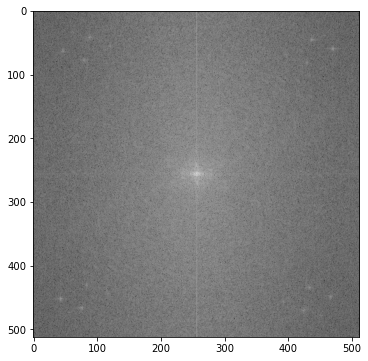

In [2]:
mandrill = openImage('img/mandrill.png')
mandrillFT = computeFT(mandrill)
mandrillMod = toVisualizeLogFT(mandrillFT)
imshow(mandrillMod)

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

In [3]:
def idealLowPassFilter(n, m, fc):
    an = np.arange(-n/2, n/2)
    am = np.arange(-m/2, m/2)
    x,y = np.meshgrid(an, am)
    
    return np.where(np.sqrt(x**2 + y**2) > fc , 0, 1)

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (use function `ifft2()` from module `numpy.fft`)
 - return the real part of filtered image

In [4]:
def lowpass(I, fc):
    ft = fftshift(fft2(I))
    ideal = (idealLowPassFilter(I.shape[0], I.shape[1], fc))
  
    filtered = ft*ideal
    return np.real(ifft2(fftshift(filtered)))

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


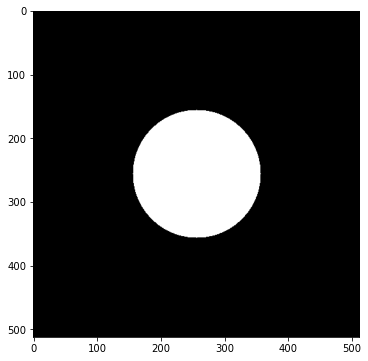

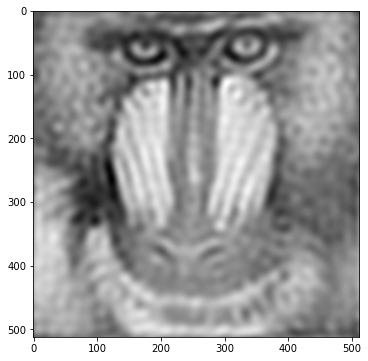

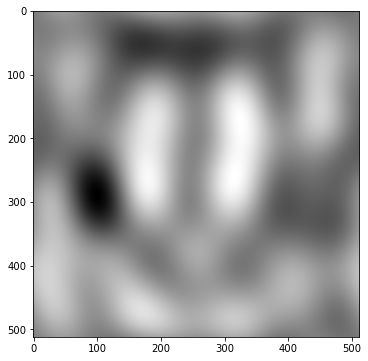

In [8]:
imshow(idealLowPassFilter(mandrill.shape[0], mandrill.shape[1], 100))
imshow(lowpass(mandrill,50))
imshow(lowpass(mandrill,25))
imshow(lowpass(mandrill,5))

**The more $f_c$ decreases, the more we lose details and the more the image gets blurry.**

**One can use low-pass filter to remove noise although one loses some details**  
**as well as to smooth the image or even to blur it** 

## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

**$\lfloor \frac{d}{2} \rfloor$ should be added to each edge to apply this filter on any given pixel.**

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

In [5]:
def imagePad(I, h):
    d = h.shape[0]
    Ibis = np.zeros((I.shape[0]+d-1, I.shape[1]+d-1))
    Ibis[int((d-1)/2):int(I.shape[0]+(d-1)/2), int((d-1)/2):int(I.shape[1]+(d-1)/2)] = I
    return Ibis

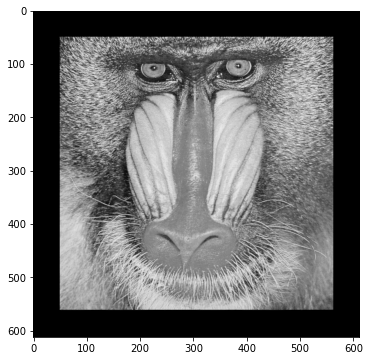

In [10]:
imshow(imagePad(mandrill, np.zeros((101,101))))

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [6]:
def conv2(I,h):
    d = h.shape[0]
    mind = -int((d-1/2))
    maxd = int((d-1)/2)
    conv = np.zeros((I.shape[0]-maxd*2, I.shape[1]-maxd*2))
    for k in range(conv.shape[0]):
        for l in range(conv.shape[1]):
            for i in range(mind,maxd):
                for j in range(mind, maxd):
                    conv[k,l] += h[i,j]*I[k-i, l-j]
    return conv


4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

In [7]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    time = (process_time()-mytime)
    mytime = process_time()
    return time

In [13]:
h3 = np.ones((3,3))
h5 = np.ones((5,5))
h7 = np.ones((7,7))

In [14]:
mandrillPadded3 = imagePad(mandrill, h3)
tic()
img3 = conv2(mandrillPadded3, h3)
t1 = tac()
imshow(img3)

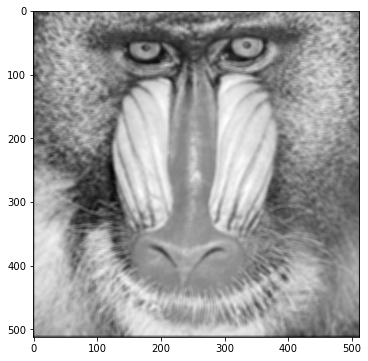

In [15]:
mandrillPadded5 = imagePad(mandrill, h5)
tic()
img5 = conv2(mandrillPadded5, h5)
t2 = tac()
imshow(img5)

In [16]:
mandrillPadded7 = imagePad(mandrill, h7)
tic()
img7 = conv2(mandrillPadded7, h7)
t3 = tac()
imshow(img7)

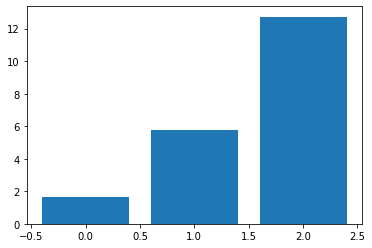

In [17]:
x = np.arange(3)
y = np.array([t1,t2,t3])

plt.bar(x,y)
plt.show()

**It appears clearly that the greater the mean-filter, the greater the effects $e.g.$ the more the filtered image loses details.**

**Furthermore, the exectution time increases (*very*) rapidly with the size of the mean-filter, suggesting the idea of filtering in the frequency domain for larger mean-filters, as convolution has a greater complexity than product, given that convolution in space-time is equal to a product in fourier's space.** 

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

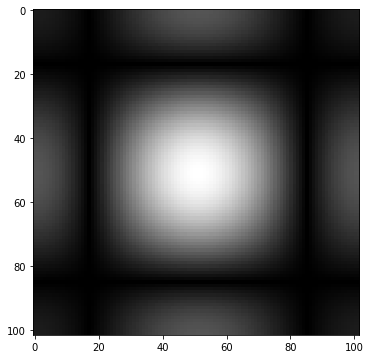

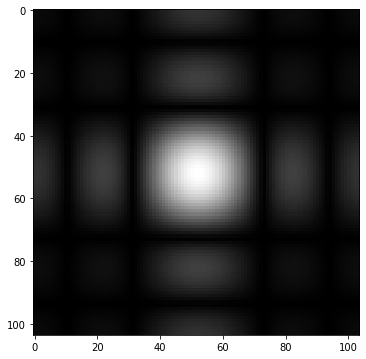

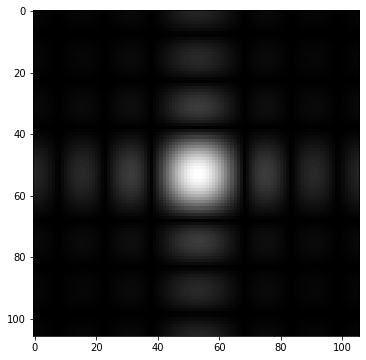

In [15]:
imshow(toVisualizeFT(computeFT(imagePad(h3,np.zeros((100,100))))))
imshow(toVisualizeFT(computeFT(imagePad(h5,np.zeros((100,100))))))
imshow(toVisualizeFT(computeFT(imagePad(h7,np.zeros((100,100))))))

6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

**A mean filter is really just a weighted $Rect()$ function in space. Hence it shows as a cardinal sinus in the frequency domain**  
**It is certainly not an ideal filter as it does not only keep or delete encountered frequencies.**

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

The width of a gaussian filter is calculated with this formula : 2$\lceil 3 \sigma \rceil$ + 1
In order to obtain a filter of size 3x3, respectivly, 5x5 and 7x7, we have to use **$\sigma$ = 0.3**, respectivly, **0.5** and **0.9**.


<ipython-input-36-8f10b9c66558>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


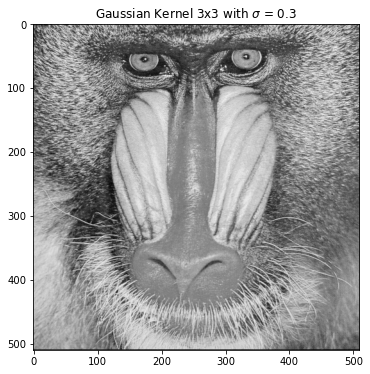

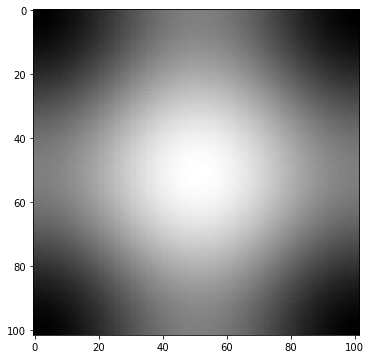

In [36]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = np.int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below

gaussianFilter = gaussianKernel(0.3)
tic()
mandrillGaussian = conv2(mandrill, gaussianFilter)
t4 = tac()
imshow(mandrillGaussian, 'Gaussian Kernel 3x3 with $\sigma$ = 0.3')

imshow(toVisualizeFT(computeFT(imagePad(gaussianFilter,np.zeros((100,100))))))

<ipython-input-36-8f10b9c66558>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


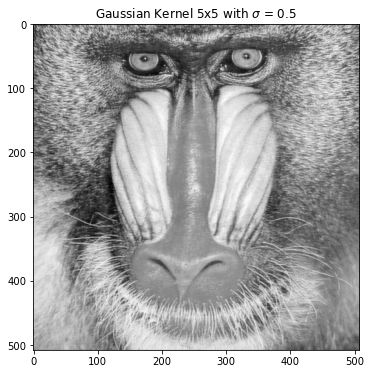

In [37]:
gaussianFilter = gaussianKernel(0.5)
tic()
mandrillGaussian = conv2(mandrill, gaussianFilter)
t5 = tac()
imshow(mandrillGaussian, 'Gaussian Kernel 5x5 with $\sigma$ = 0.5')

imshow(toVisualizeFT(computeFT(imagePad(gaussianFilter,np.zeros((100,100))))))

In [38]:
gaussianFilter = gaussianKernel(0.9)
tic()
mandrillGaussian = conv2(mandrill, gaussianFilter)
t6 = tac()
imshow(mandrillGaussian, 'Gaussian Kernel 7x7 with $\sigma$ = 0.9')

imshow(toVisualizeFT(computeFT(imagePad(gaussianFilter,np.zeros((100,100))))))

<ipython-input-36-8f10b9c66558>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


In [39]:
x = np.arange(3)
y = np.array([t4, t5, t6])

plt.bar(x,y)
plt.show()

## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

In [17]:
barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I, factor = 2):
    """ Array -> Array """
    return I[::factor,::factor]

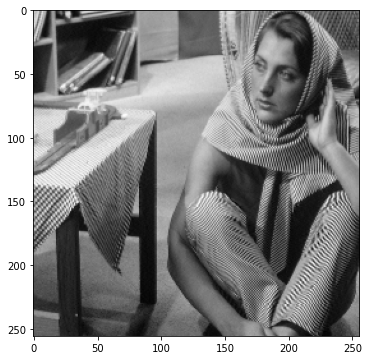

In [18]:
barbaraSub = subSample2(barbara)
imshow(barbara)
imshow(barbaraSub)

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

In [19]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A

**Filtering in the frequency domain takes a product of an image and a filter instead of a convolution of the two in space domain.**

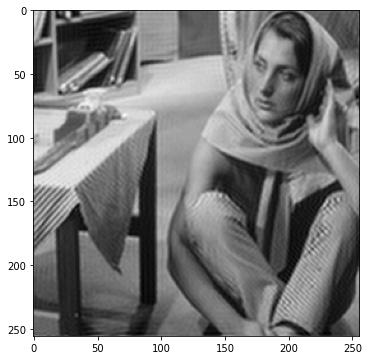

In [20]:
barbaraSubFT = fftshift(fft2(barbaraSub))
filteredBarbara = barbaraSubFT*antiAliasingFilter(barbaraSubFT.shape[0],barbaraSubFT.shape[1])
filteredBarbara = np.real(ifft2(fftshift(filteredBarbara)))
imshow(filteredBarbara)

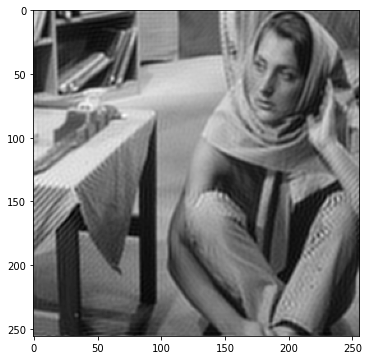

In [21]:
imshow(lowpass(barbaraSub, 70))

3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

**$\bullet$ Above are displayed two versions of the filtered subsampled picture : with and without a low pass antialiasing filter.**  
**$\bullet$ The antialiasing filter appears to partially remove the aliasing-induced patterns, although  it loses even more details of the original picture.**  
**$\bullet$ Though, the standard ideal filter loses even more details to not even achieve the same anitaliasing effect.**

## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

In [22]:
I1 = openImage("img/clown.bmp")
I2 = openImage("img/clown_lumi.bmp")

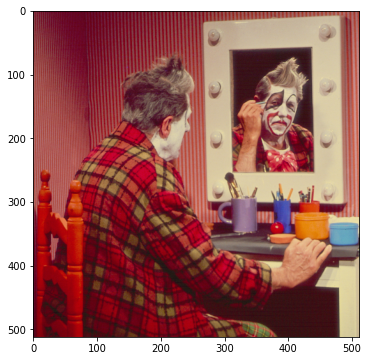

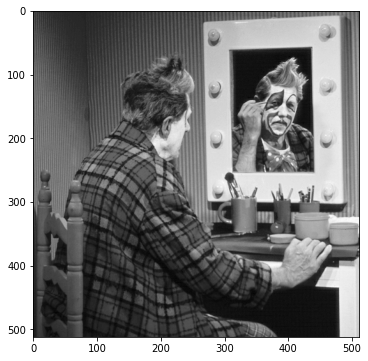

(512, 512, 3) (512, 512)


In [23]:
imshow(I1)
imshow(I2)
print(I1.shape, I2.shape)

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

**The first image displays RGB colors, and thus is of dimension 3, actually storing 3-tuples instead of single pixel values :**

In [34]:
print(I1[:1,:1,:])
print(I2[:1,:1])

[[[122  26  40]]]
[[67]]


In [51]:
def extractChanels(I):
    # let's return split array on the last dimension (3rd in this case)
    return np.dsplit(I, I.shape[-1])

Ir, Ig, Ib = extractChanels(I1)
Ir = Ir.reshape(I2.shape)
Ig = Ig.reshape(I2.shape)
Ib = Ib.reshape(I2.shape)
print(Ir)

[[122 127 124 ... 166 169 168]
 [124 130 127 ... 168 167 168]
 [126 125 123 ... 169 172 169]
 ...
 [ 87  88  83 ... 199 202 204]
 [ 86  86  86 ... 202 202 204]
 [ 86  88  89 ... 202 200 201]]


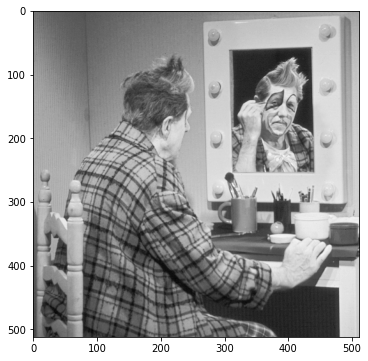

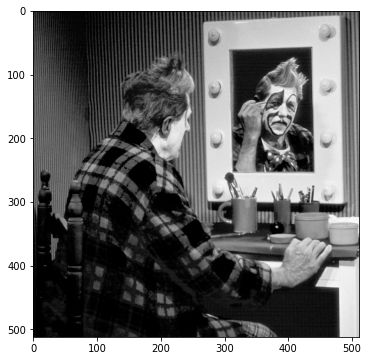

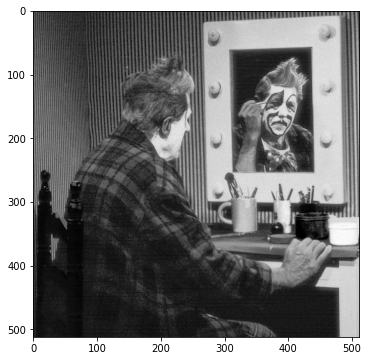

In [52]:
imshow(Ir)
imshow(Ig)
imshow(Ib)

**The separate channels are displayed in grayscale. Hence the brighter the tones, the more the corresponding color is present.**

**If we want to display these channels as colorfull image, we need to add zeros for the two other color channels and get back to a 3-dimensional array :** 

In [61]:
def singleChannelInRGB(I, pos):
    result = np.zeros((I.shape[0], I.shape[1], 3))
    result[:,:,pos] = I/256
    return result

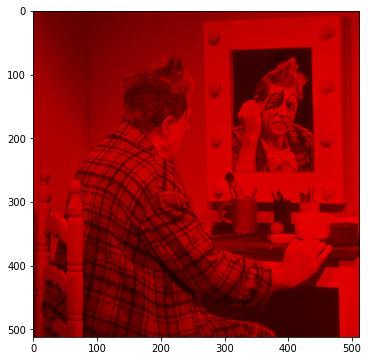

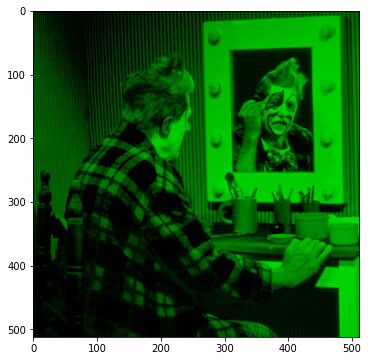

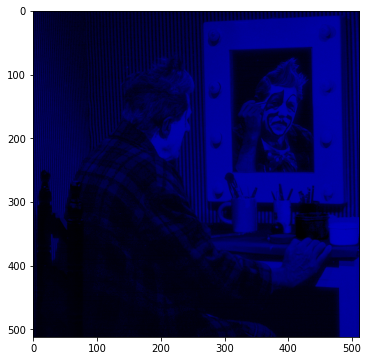

In [62]:
imshow(singleChannelInRGB(Ir,0))
imshow(singleChannelInRGB(Ig,1))
imshow(singleChannelInRGB(Ib,2))

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

In [73]:
def stackChannels(Ir, Ig, Ib):
    result = np.zeros((Ir.shape[0], Ir.shape[1], 3))
    result[:,:,0] = Ir/256
    result[:,:,1] = Ig/256
    result[:,:,2] = Ib/256
    return result

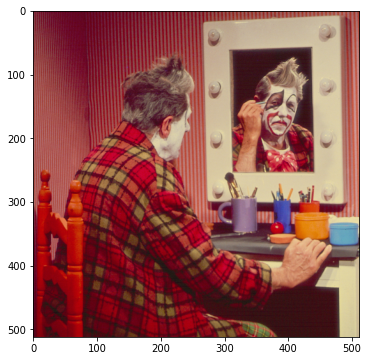

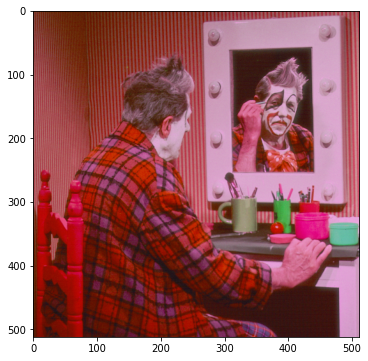

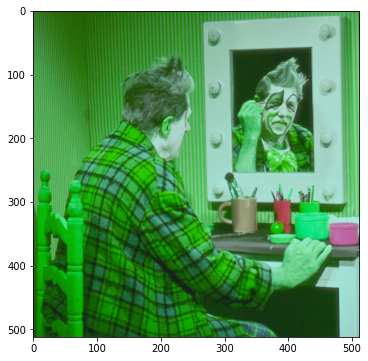

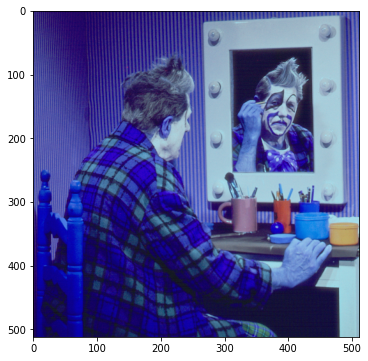

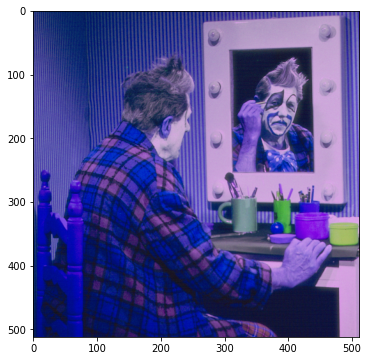

In [74]:
# Let's test all six possibilities
imshow(stackChannels(Ir,Ig,Ib))
imshow(stackChannels(Ir,Ib,Ig))
imshow(stackChannels(Ib,Ir,Ig))
imshow(stackChannels(Ib,Ig,Ir))
imshow(stackChannels(Ig,Ir,Ib))
imshow(stackChannels(Ig,Ib,Ir))

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

***cf* `singleChanelInRGB` written in question 2.**